# Задание 1
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [90]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
b=load_boston()
X=pd.DataFrame(b.data, columns=b.feature_names)
y=pd.DataFrame(b.target, columns=['Price'])
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
R2=r2_score(y_test, y_pred_lr)
R2

0.6844267283527059

# Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

бучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],чтобы получить из датафрейма одномерный массив Numpy,так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [3]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(X_train, y_train.values[:, 0])
y_pred=model.predict(X_test)
R2=r2_score(y_test, y_pred)
R2

0.8563473113827311

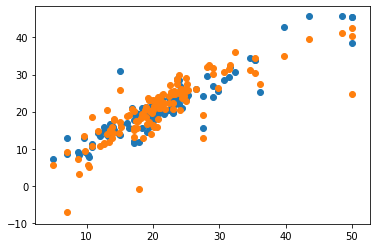

In [4]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.scatter(y_test, y_pred_lr)
plt.show()

# Задание 3
Вызовите документацию для класса RandomForestRegressor,найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности,установите, какие два признака показывают наибольшую важность.

In [5]:
param=pd.Series(model.feature_importances_, b.feature_names)
param=param.sort_values(ascending=False)
sum_param=sum(param)
print('Сумма параметров: ',sum_param)
print(param.head(2))

Сумма параметров:  1.0000000000000002
RM       0.438168
LSTAT    0.381863
dtype: float64


# Задание 4
В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.

Мы будем вычислять AUC, то есть площадь под кривой ROC.

Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

Загрузите датасет creditcard.csv и создайте датафрейм df.

С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100.

Просмотрите первые 10 строк датафрейма df.

Создайте датафрейм X из датафрейма df, исключив столбец Class.

Создайте объект Series под названием y из столбца Class.

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.

У вас должны получиться объекты X_train, X_test, y_train и y_test.

Просмотрите информацию о их форме.

Для поиска по сетке параметров задайте такие параметры:parameters = [{'n_estimators': [10, 15],'max_features': np.arange(3, 5),'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами:

estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.

Обучите модель на тренировочном наборе данных (может занять несколько минут).

Просмотрите параметры лучшей модели с помощью атрибута best_params_.

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.

Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив 
y_pred_proba. 

Из модуля sklearn.metrics импортируйте метрику roc_auc_score.

Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументовмассивы y_test и y_pred_proba.

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
pd.options.display.max_columns = 100
df = pd.read_csv('creditcard.csv')
print(df.Class.value_counts(normalize=True))
X=df.drop(columns='Class',axis=1)
y=df.Class

0    0.998273
1    0.001727
Name: Class, dtype: float64


In [7]:
X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [8]:
print(X_test.shape,  X_test.shape, y_train.shape,y_test.shape)

(85443, 30) (85443, 30) (199364,) (85443,)


In [9]:
parameters = [{'n_estimators': [10, 15],'max_features': np.arange(3, 5),'max_depth': np.arange(4, 7)}]
m=GridSearchCV(estimator=RandomForestClassifier(random_state=100),param_grid=parameters,scoring='roc_auc',cv=3)
m.fit(X_train,y_train)
m.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [10]:
def testAUC(real,mod):
    AUC=roc_auc_score(real,mod)
    print(AUC)
y_pred_proba=(m.predict_proba(X_test))[:,1]

print('Расчет AUC на тестовых данных:')
testAUC(y_test,y_pred_proba)

print('Расчет AUC на тренировочных данных:')
testAUC(y_train,(m.predict_proba(X_train))[:,1])

Расчет AUC на тестовых данных:
0.9462664156037156
Расчет AUC на тренировочных данных:
0.9703527882554751


# Задание на повторение материала 1
Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

In [92]:
from sklearn.datasets import load_wine 
data=load_wine()

# Задание на повторение материала 2
Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

In [93]:
print(type(data))
datas_key=data.keys()
print(datas_key)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


# Задание на повторение материала 3
 Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.

In [24]:
print(data.DESCR)

# Задание на повторение материала 4
Сколько классов содержит целевая переменная датасета? Выведите названия классов.

In [28]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

# Задание 5
На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.

In [94]:
X=pd.DataFrame(data.data, columns=data.feature_names)

# Задание 6
Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [95]:
X.shape
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

# Задание 7
 Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

In [119]:
X['target']=data.target

# Задание 8
Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

In [97]:
X_corr=X.corr()
X_corr.index

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

# Задание 9
Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).

In [111]:
high_corr=X_corr[abs(X_corr).target>0.5].index.to_list()
high_corr.remove('target')
print(high_corr)

['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue', 'od280/od315_of_diluted_wines', 'proline']


# Задание 10
Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.


In [128]:
X.drop(['target'], axis='columns', inplace=True)
X[[i+'_2' for i in high_corr]]=(X[high_corr])**2
X.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,243.36,7.8400,9.3636,1.0816,15.3664,1134225.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,125.44,7.0225,7.6176,1.1025,11.5600,1102500.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,345.96,7.8400,10.4976,1.0609,10.0489,1404225.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,282.24,14.8225,12.1801,0.7396,11.9025,2190400.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,441.00,7.8400,7.2361,1.0816,8.5849,540225.0
